Este conjunto de datos incluye registros de viaje de todos los viajes realizados en taxis amarillos en la ciudad de Nueva York desde 2009. Los registros incluyen campos que capturan fechas/horas de recogida y entrega, lugares de recogida y entrega, distancias de viaje, tarifas detalladas, tipos de tarifas, tipos de pago y recuentos de pasajeros informados por el conductor. Los datos utilizados en los conjuntos de datos adjuntos fueron recopilados y proporcionados a la Comisión de Taxis y Limusinas de la Ciudad de Nueva York (TLC) por proveedores de tecnología autorizados por el Programa de Mejora de Pasajeros de Taxis (TPEP). Los datos del viaje no fueron creados por la TLC, y la TLC no se responsabiliza de la precisión de estos datos.

`vendor_id`	STRING 	Una designación para el proveedor de tecnología que proporcionó el registro. CMT=Tecnologías móviles creativas VTS= VeriFone, Inc. DDS=Sistemas de envío digital

`pickup_datetime`	TIMESTAMP  fecha y la hora en que se activó el medidor.

`dropoff_datetime`	TIMESTAMP	La fecha y hora en que se desconectó el medidor.

`pickup_longitude`	FLOAT Longitud donde se conectp el medidor.	

`pickup_latitude`	FLOAT	Latitud en la que se conectó el contador.	

`dropoff_longitude`	FLOAT	NULLABLE Longitud en la que se desconectó el contador.

`dropoff_latitude`	FLOAT	Latitud en la que se desconectó el contador.

`rate_code`	STRING  El último código de tarifa vigente al final del viaje. 1 = Tarifa estándar 2 = JFK 3 = Newark 4 = Nassau o Westchester 5 = Tarifa negociada 6 = Viaje en grupo


`passenger_count`	INTEGER	El número de pasajeros en el vehículo. Este es un valor ingresado por el controlador.

`trip_distance`	FLOAT	La distancia del viaje transcurrido en millas reportada por el taxímetro.

`payment_type`	STRING	Un código numérico que significa cómo el pasajero pagó por el viaje. CRD= Tarjeta de crédito CSH= Efectivo NOC= Sin cargo DIS= Disputa UNK= Desconocido			


`fare_amount`	FLOAT	La tarifa de tiempo y distancia calculada por el taxímetro.

`extra`	FLOAT	Varios extras y recargos. Actualmente, esto solo incluye los cargos de $0.50 y $1 por la hora pico y por la noche.

`mta_tax`	FLOAT	Impuesto MTA de $0.50 que se activa automáticamente en función de la tarifa medida en uso.

`imp_surcharge`	FLOAT	Recargo por mejora de $ 0.30 evaluado en viajes en el lanzamiento de bandera. El recargo por mejora comenzó a cobrarse en 2015.

`tip_amount`	FLOAT	Importe de la propina: este campo se completa automáticamente para las propinas de tarjetas de crédito. Las propinas en efectivo no están incluidas.

`tolls_amount`	FLOAT	Importe total de todos los peajes pagados en el viaje.

`total_amount`	FLOAT	El monto total cobrado a los pasajeros. No incluye propinas en efectivo.

`store_and_fwd_flag`	STRING	Esta bandera indica si el registro de viaje se mantuvo en la memoria del vehículo antes de enviarlo al proveedor, también conocido como "almacenar y reenviar", porque el vehículo no tenía conexión con el servidor. Y= viaje de almacenamiento y reenvío N= no es un viaje de almacenamiento y reenvío.



#Usadas

`tolls_amount`	FLOAT	Importe total de todos los peajes pagados en el viaje.

`fare_amount`	FLOAT	La tarifa de tiempo y distancia calculada por el taxímetro.

`passenger_count`	INTEGER	El número de pasajeros en el vehículo. Este es un valor ingresado por el controlador.

`pickup_datetime`	TIMESTAMP  fecha y la hora en que se activó el medidor.

`pickup_longitude`	FLOAT Longitud donde se conectp el medidor.	

`pickup_latitude`	FLOAT	Latitud en la que se conectó el contador.	

`dropoff_longitude`	FLOAT	NULLABLE Longitud en la que se desconectó el contador.

`dropoff_latitude`	FLOAT	Latitud en la que se desconectó el contador.

In [1]:
%%bash

export PROJECT=$(gcloud config list project --format "value(core.project)")
echo "Your current GCP Project Name is: "$PROJECT

Your current GCP Project Name is: qwiklabs-gcp-02-4f8e6a82c3f9


In [1]:
!pip install --user google-cloud-bigquery

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 7.9 MB/s eta 0:00:0000:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tfx-bsl 1.4.0 requires protobuf<4,>=3.13, but you have protobuf 4.22.1 which is incompatible.
tensorflow 2.6.5 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.22.1 which is incompatible.
tensorflow 2.6.5 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
tensorflow 2.6.5 requires typing-extensions<3.11,>=3.7, but you have typing-extensions 4.4.0 which is incompatible.
tensorflow-transform 1.4.1 requires protobuf<4,>=3.13, but you have protobuf 4.22.1 which is incompatible.
tensorflow-metadata 1.4.0 requires protobuf<4,>=3.13, but you have protobuf 4.22.1 which is incompatible.
tensorboardx 2.6 requires protobuf<4,>=3.8.0, but you have protobuf 4.22.1 which is incompatible.
tensorboard 2.6.0 requires goog

In [2]:
!bq --location=US mk --dataset \
   --description 'Taxi Fare'  \
   $PROJECT:feat_eng

Dataset 'qwiklabs-gcp-02-e4feeeff3f6c:feat_eng' successfully created.


In [3]:
%%bigquery 

CREATE OR REPLACE TABLE
  feat_eng.feateng_training_data AS
SELECT
  (tolls_amount + fare_amount) AS fare_amount,
  passenger_count*1.0 AS passengers,
  pickup_datetime,
  pickup_longitude AS pickuplon,
  pickup_latitude AS pickuplat,
  dropoff_longitude AS dropofflon,
  dropoff_latitude AS dropofflat
FROM
  `nyc-tlc.yellow.trips`
WHERE
  MOD(ABS(FARM_FINGERPRINT(CAST(pickup_datetime AS STRING))), 10000) = 1
  AND fare_amount >= 2.5
  AND passenger_count > 0
  AND pickup_longitude > -78
  AND pickup_longitude < -70
  AND dropoff_longitude > -78
  AND dropoff_longitude < -70
  AND pickup_latitude > 37
  AND pickup_latitude < 45
  AND dropoff_latitude > 37
  AND dropoff_latitude < 45

Query is running:   0%|          |

""


In [4]:
%%bigquery

CREATE OR REPLACE MODEL  feat_eng.baseline_model 

OPTIONS (model_type='linear_reg', input_label_cols=['fare_amount']) AS

SELECT
  fare_amount,
  passengers,
  pickup_datetime,
  pickuplon,
  pickuplat,
  dropofflon,
  dropofflat
FROM
  feat_eng.feateng_training_data

Query is running:   0%|          |

""


In [5]:
%%bigquery

SELECT
  *,
  SQRT(loss) AS rmse
FROM
  ML.TRAINING_INFO(MODEL feat_eng.baseline_model)

Query is running:   0%|          |

Downloading:   0%|          |

,training_run,iteration,loss,eval_loss,learning_rate,duration_ms,rmse
0,0,0,74.435359,68.88023,NaN,17883,8.627593


In [6]:
%%bigquery

SELECT
  *
FROM
  ML.EVALUATE(MODEL feat_eng.baseline_model)

Query is running:   0%|          |

Downloading:   0%|          |

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,5.213497,68.88023,0.258102,3.794902,0.226067,0.226132


In [7]:
%%bigquery

SELECT * FROM ML.PREDICT(MODEL feat_eng.baseline_model, 
      ( 
           SELECT
             fare_amount,
             passengers,
             pickup_datetime,
             pickuplon,
             pickuplat,
             dropofflon,
             dropofflat
           FROM
             feat_eng.feateng_training_data 
      ));

Query is running:   0%|          |

Downloading:   0%|          |

,predicted_fare_amount,fare_amount,passengers,pickup_datetime,pickuplon,pickuplat,dropofflon,dropofflat
0,9.799903,2.50,2.0,2012-08-09 21:22:56+00:00,-73.993520,40.746670,-73.994115,40.745960
1,8.459084,2.50,2.0,2012-04-15 23:57:00+00:00,-73.996228,40.743237,-73.996418,40.742972
2,40.020240,2.50,2.0,2011-05-14 14:49:33+00:00,-73.790031,40.645675,-73.789944,40.644809
3,10.539917,2.50,2.0,2009-11-08 02:46:00+00:00,-73.952472,40.776608,-73.952470,40.776598
4,24.570213,2.50,2.0,2009-10-06 16:18:02+00:00,-73.961119,40.600506,-73.961119,40.600506
...,...,...,...,...,...,...,...,...
106540,14.307915,38.67,1.0,2009-09-20 08:29:00+00:00,-73.964555,40.763810,-73.845527,40.790812
106541,11.396927,38.67,1.0,2009-09-03 12:50:59+00:00,-74.015465,40.711512,-73.885812,40.773217
106542,11.101820,42.67,1.0,2009-10-05 14:41:00+00:00,-74.007852,40.740917,-73.871225,40.774065
106543,17.005942,42.67,1.0,2010-01-27 22:22:48+00:00,-73.863349,40.772327,-74.014899,40.709536


In [10]:
from google.cloud import bigquery
import pandas as pd

In [11]:
client = bigquery.Client()
query1 = """ SELECT
             fare_amount,
           FROM
             feat_eng.feateng_training_data   """
res  = client.query(query1)
res1 = res.result()
orig = res1.to_dataframe()

In [12]:
orig.head(1)

,fare_amount
0,2.5


In [13]:
# Crea un cliente de BigQuery
#client = bigquery.Client()

# Define tu consulta
query = """
SELECT * FROM ML.PREDICT(MODEL feat_eng.baseline_model, 
      ( 
          ( SELECT
             fare_amount,
             passengers,
             pickup_datetime,
             pickuplon,
             pickuplat,
             dropofflon,
             dropofflat
           FROM
             feat_eng.feateng_training_data )
      ))
"""
# Ejecuta la consulta
query_job = client.query(query)
# Espera a que la consulta termine
query_job.result()
# Lee los resultados en un DataFrame de Pandas
df = query_job.to_dataframe()
# Muestra los primeros 5 registros del DataFrame
print(df.head(1))

   predicted_fare_amount  fare_amount  passengers           pickup_datetime  \
0               9.799903          2.5         2.0 2012-08-09 21:22:56+00:00   

   pickuplon  pickuplat  dropofflon  dropofflat  
0  -73.99352   40.74667  -73.994115    40.74596  


In [14]:
pred = df['predicted_fare_amount'].values

In [15]:
org = orig['fare_amount'].values

In [16]:
import matplotlib.pyplot as plt

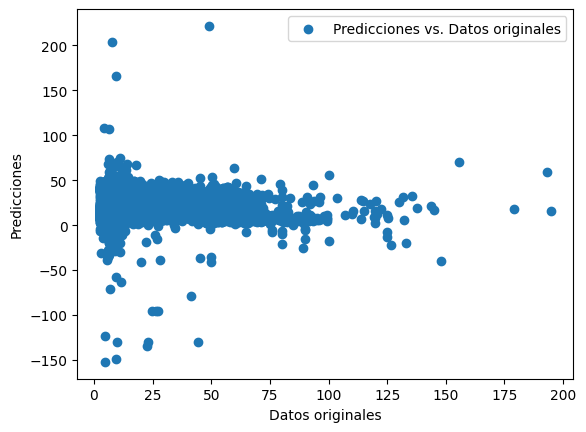

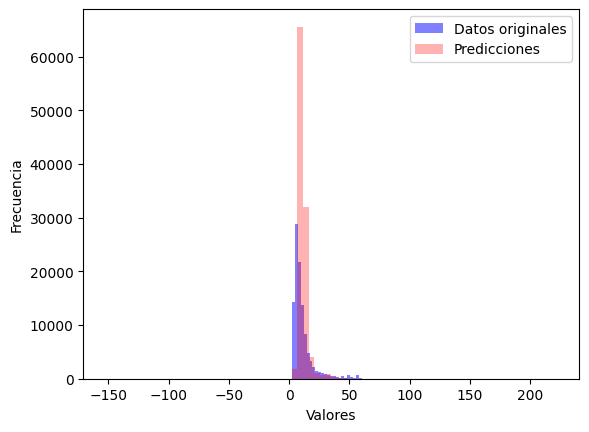

In [17]:
plt.scatter(orig, pred, label="Predicciones vs. Datos originales")
plt.xlabel("Datos originales")
plt.ylabel("Predicciones")
plt.legend()
plt.show()

# Crear histogramas superpuestos para mostrar la distribución de ambos conjuntos de datos
plt.hist(orig, bins=80, alpha=0.5, label="Datos originales", color='blue')
plt.hist(pred, bins=80, alpha=0.3, label="Predicciones", color='red')
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

In [18]:
import numpy as np

In [19]:
np.column_stack((org, pred))

array([[ 2.5       ,  9.79990292],
       [ 2.5       ,  8.45908449],
       [ 2.5       , 40.02024043],
       ...,
       [42.67      , 11.10182045],
       [42.67      , 17.00594173],
       [46.67      , 20.64598435]])

In [20]:
%%bigquery

# Use the `TRANSFORM` clause
CREATE OR REPLACE MODEL
  feat_eng.final_model  TRANSFORM(fare_amount,

    ST_Distance(ST_GeogPoint(pickuplon,
        pickuplat),
      ST_GeogPoint(dropofflon,
        dropofflat)) AS euclidean,
 
    ML.FEATURE_CROSS(STRUCT(CAST(EXTRACT(DAYOFWEEK
          FROM
            pickup_datetime) AS STRING) AS dayofweek,
        CAST(EXTRACT(HOUR
          FROM
            pickup_datetime) AS STRING) AS hourofday)) AS day_hr,
    CONCAT( ML.BUCKETIZE(pickuplon,
        GENERATE_ARRAY(-78, -70, 0.01)), ML.BUCKETIZE(pickuplat,
        GENERATE_ARRAY(37, 45, 0.01)), ML.BUCKETIZE(dropofflon,
        GENERATE_ARRAY(-78, -70, 0.01)), ML.BUCKETIZE(dropofflat,
        GENERATE_ARRAY(37, 45, 0.01)) ) AS pickup_and_dropoff ) OPTIONS(input_label_cols=['fare_amount'],
    model_type='linear_reg',
    l2_reg=0.1) AS
SELECT
  *
FROM
  feat_eng.feateng_training_data

Query is running:   0%|          |

""


In [21]:
%%bigquery

# Use `ML.TRAINING_INFO` function which allows you to see information about the training iterations of a model
SELECT
  *,
  SQRT(loss) AS rmse
FROM
  ML.TRAINING_INFO(MODEL feat_eng.final_model)

Query is running:   0%|          |

Downloading:   0%|          |

,training_run,iteration,loss,eval_loss,learning_rate,duration_ms,rmse
0,0,3,11.543481,29.058845,0.4,3811,3.397570
1,0,2,14.003867,31.897211,0.8,4487,3.742174
2,0,1,21.037874,32.961365,0.4,3779,4.586706
3,0,0,69.922209,76.298004,0.2,3210,8.361950


In [22]:
%%bigquery

# Use `ML.EVALUATE` function to evaluate model metrics. 
SELECT
  *
FROM
  ML.EVALUATE(MODEL feat_eng.final_model)

Query is running:   0%|          |

Downloading:   0%|          |

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,2.623061,29.058845,0.086064,1.569298,0.673497,0.67393


In [23]:
%%bigquery

# Use `ML.EVALUATE` function to evaluate model metrics. 
SELECT
  SQRT(mean_squared_error) AS rmse
FROM
  ML.EVALUATE(MODEL feat_eng.final_model)

Query is running:   0%|          |

Downloading:   0%|          |

,rmse
0,5.390626


In [25]:
query = """
SELECT * FROM ML.PREDICT(MODEL feat_eng.final_model, 
      ( 
          ( SELECT
             fare_amount,
             passengers,
             pickup_datetime,
             pickuplon,
             pickuplat,
             dropofflon,
             dropofflat
           FROM
             feat_eng.feateng_training_data )
      ))
"""
# Ejecuta la consulta
query_job = client.query(query)
# Espera a que la consulta termine
query_job.result()
# Lee los resultados en un DataFrame de Pandas
df = query_job.to_dataframe()
# Muestra los primeros 5 registros del DataFrame
print(df.head(1))

   predicted_fare_amount  fare_amount  passengers           pickup_datetime  \
0               4.884205          2.5         2.0 2012-08-09 21:22:56+00:00   

   pickuplon  pickuplat  dropofflon  dropofflat  
0  -73.99352   40.74667  -73.994115    40.74596  


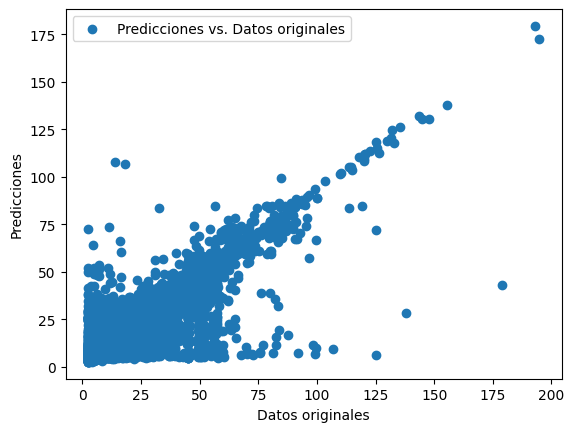

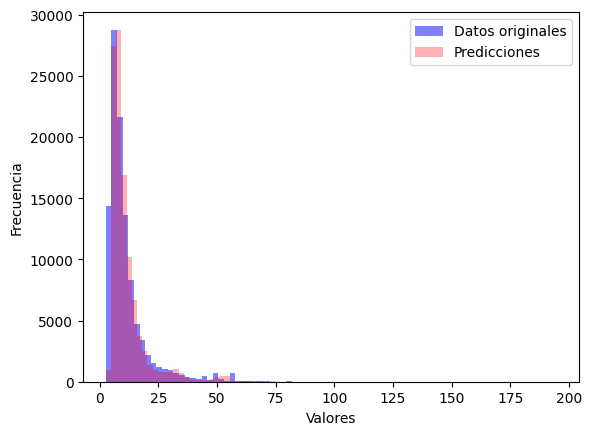

In [26]:
pred = df['predicted_fare_amount'].values
org = orig['fare_amount'].values

plt.scatter(orig, pred, label="Predicciones vs. Datos originales")
plt.xlabel("Datos originales")
plt.ylabel("Predicciones")
plt.legend()
plt.show()

# Crear histogramas superpuestos para mostrar la distribución de ambos conjuntos de datos
plt.hist(orig, bins=80, alpha=0.5, label="Datos originales", color='blue')
plt.hist(pred, bins=80, alpha=0.3, label="Predicciones", color='red')
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()